<a href="https://colab.research.google.com/github/Arpitsinghvampire/machine_learning/blob/main/lstm_time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np


In [4]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13568290/13568290 [==============================] - 2s 0us/step


In [5]:
#now we read the csv file
df=pd.read_csv(csv_path)
df


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [6]:
#for our intial analysis we wont take that much data
df=df[5::6]
#start from the  5th row and then take every 6th element


In [7]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [8]:
#now we modify the data time of the data time row
#we now would set up  the date and time as the index
df.index=pd.to_datetime(df['Date Time'],format='%d.%m.%Y %H:%M:%S')

#now this becomes our index row


In [9]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [10]:
#now this leads to duplication of the data so we would now remove the date time row
df=df.drop('Date Time',axis=1)

In [11]:
#Now lets see the dataframe
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


<Axes: xlabel='Date Time'>

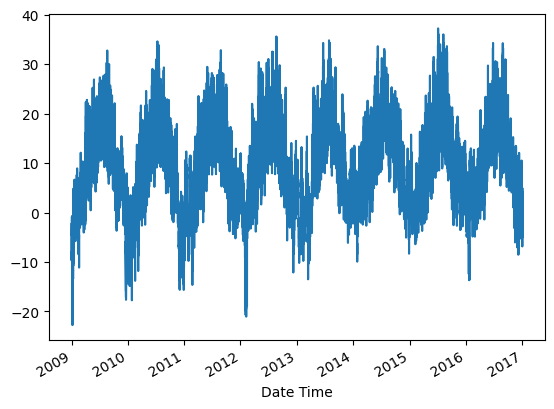

In [12]:
#now lets plot some plots
temp=df['T (degC)']
temp.plot()

In [13]:
def df_to_X_y(df,window_size=5): #here we create a window for forecasting the data
  df_as_np=df.to_numpy()
  X=[]
  y=[]
  for i in range(len(df_as_np)-window_size):
    row=[[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label=df_as_np[i+window_size]
    y.append(label)
  return np.array(X),np.array(y)


In [14]:
window_size=5
X,y=df_to_X_y(temp,window_size)
X.shape,y.shape

((70086, 5, 1), (70086,))

In [15]:
#now after making the suitable change ,we need to split into the train
#validation and the test set
x_train,y_train=X[:50000],y[:50000]
x_val,y_val=X[50000:65000],y[50000:65000]
x_test,y_test=X[65000:],y[65000:]

In [16]:
print(x_train.shape,y_train.shape)

(50000, 5, 1) (50000,)


In [17]:

#now after getting the required train ,test and the validation data
#we now create the model

#we import the necessary dependencies
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

#now we create the model
model1=Sequential()
model1.add(InputLayer(input_shape=(window_size,1)))
model1.add(LSTM(64))
model1.add(Dense(8,'relu'))
model1.add(Dense(1,'linear')) #to get the numerical value


model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


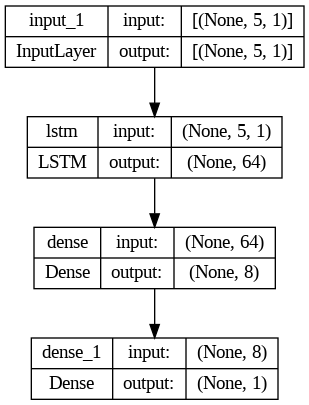

In [18]:
from keras.utils import plot_model
plot_model(model1,show_layer_names=True,show_shapes=True)

In [19]:
#here we create our model checkpoint
cp=ModelCheckpoint('model1/',save_best_only=True)

#now lets compile the model
model1.compile(loss=MeanSquaredError(reduction='auto'),optimizer=Adam(learning_rate=0.01),metrics=[RootMeanSquaredError()])


In [20]:
y_train

array([-9.67, -9.17, -8.1 , ..., 14.45, 14.4 , 14.24])

In [21]:
#now we fit the data to. the model
model1.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10,callbacks=[cp])

Epoch 1/10
1563/1563 [==============================] - 16s 8ms/step - loss: 1.7588 - root_mean_squared_error: 1.3262 - val_loss: 0.6253 - val_root_mean_squared_error: 0.7907
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7243 - root_mean_squared_error: 0.8510 - val_loss: 0.8790 - val_root_mean_squared_error: 0.9376
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7254 - root_mean_squared_error: 0.8517 - val_loss: 0.6397 - val_root_mean_squared_error: 0.7998
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7222 - root_mean_squared_error: 0.8498 - val_loss: 0.7863 - val_root_mean_squared_error: 0.8867
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7176 - root_mean_squared_error: 0.8471 - val_loss: 0.6492 - val_root_mean_squared_error: 0.8058
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7095 - root_mean_squared_error: 0.8423 - val_loss

In [22]:
from tensorflow.keras.models import load_model
model1=load_model('model1/')
train_predictions=model1.predict(x_train).flatten()


1563/1563 [==============================] - 4s 2ms/step


In [23]:


train_results=pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals': y_train})
train_results

,Train Predictions,Actuals
0,-9.714579,-9.67
1,-9.172339,-9.17
2,-8.303576,-8.10
3,-6.877893,-7.66
4,-6.924614,-7.04
...,...,...
49995,14.687187,14.73
49996,14.631846,14.64
49997,14.528784,14.45
49998,14.282748,14.40


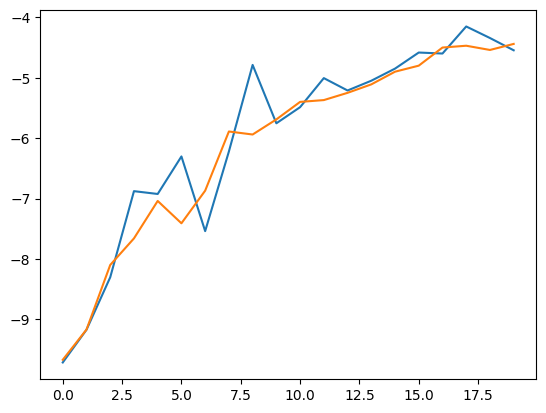

In [26]:
#now lets plot the graph
#here we plot for only 20 iterations

import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:20])
plt.plot(train_results['Actuals'][:20])

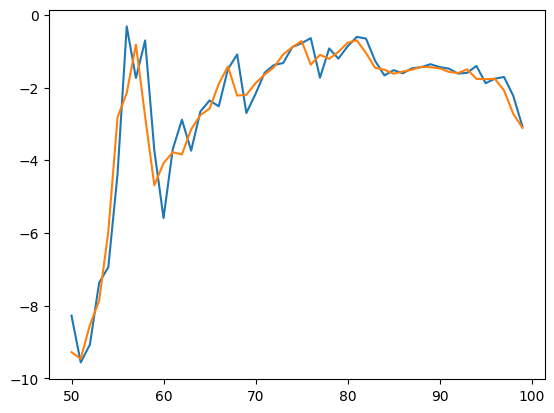

In [27]:
#now lets plot the graph
#here we plot for only 50 iterations

import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])